In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import pandas as pd


In [6]:
x_dt = np.linspace(0.0,10.0,1000000)


In [7]:
noise = np.random.randn(1000000)

In [8]:
y_tr = (0.5 * x_dt) + 5 + noise

In [10]:
x_df = pd.DataFrame(data= x_dt,columns = ['x_data'])

In [11]:
y_df = pd.DataFrame(data= y_tr,columns = ['y_data'])

In [12]:
x_df.head()

,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [14]:
my_data.head()

,x_data,y_data
0,0.00000,4.515919
1,0.00001,4.169066
2,0.00002,4.101185
3,0.00003,7.718604
4,0.00004,4.568275


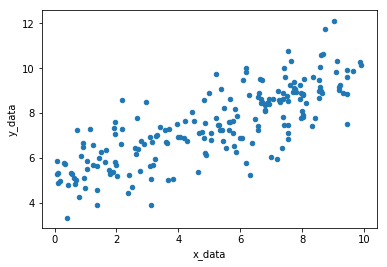

In [16]:
my_data.sample(n = 200).plot(kind ='scatter',x='x_data',y='y_data')

In [60]:
batch = 16
rand = np.random.rand(2)
rand

array([0.03854426, 0.40798026])

In [63]:
m = tf.Variable(0.03854426)
b = tf.Variable(0.40798026)

In [64]:
x_in = tf.placeholder(tf.float32,[batch])
y_in = tf.placeholder(tf.float32,[batch])

In [65]:
y_line = m*x_in + b

In [66]:
loss = tf.reduce_sum(tf.square(y_in-y_line))

In [67]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [68]:
train = opt.minimize(loss)

In [69]:
init = tf.global_variables_initializer()

In [70]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000

    for i in range(batches):
        rand_ind = np.random.randint(len(x_dt),size = batch)
        
        feed = {x_in:x_dt[rand_ind],y_in:y_tr[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    m_fit,b_fit = sess.run(([m,b]))
    
    

In [71]:
y_pl = x_dt*m_fit + b_fit

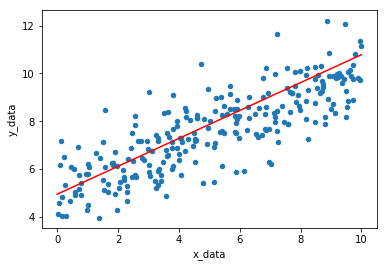

In [74]:
my_data.sample(250).plot(kind='scatter',x = 'x_data',y='y_data')
plt.plot(x_dt,y_pl,'r')